In [10]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')


In [8]:
appl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [14]:
appl.iloc[0]['Adj. Close']

52.848786580038002

In [17]:
for stock_df in (appl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

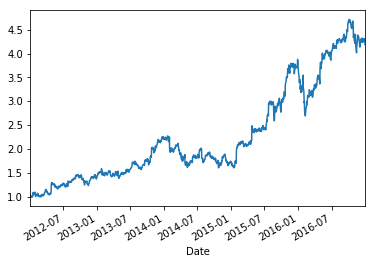

In [26]:
amzn['Normed Return'].plot()

In [ ]:
# 30% appl
# 20 % cisco
# 40 % amazon
# 10% ibm

In [28]:
for stock_df, allo in zip((appl, cisco, ibm, amzn), [.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [29]:
appl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [30]:
for stock_df in (appl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [31]:
appl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [34]:
all_pos_vals = [appl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis=1)

In [36]:
portfolio_val.tail()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119


In [37]:
portfolio_val.columns = ['Apple Position', 'CISCO Position', 'IBM Position', 'Amazon Position']

In [38]:
portfolio_val.head()

,Apple Position,CISCO Position,IBM Position,Amazon Position
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [39]:
portfolio_val['Total'] = portfolio_val.sum(axis=1)

In [40]:
portfolio_val.head()

,Apple Position,CISCO Position,IBM Position,Amazon Position,Total
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


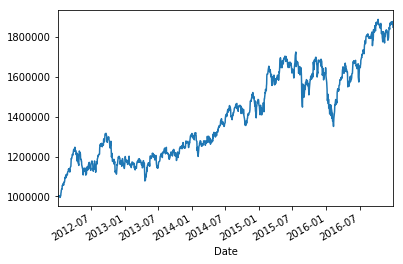

In [42]:
portfolio_val['Total'].plot()

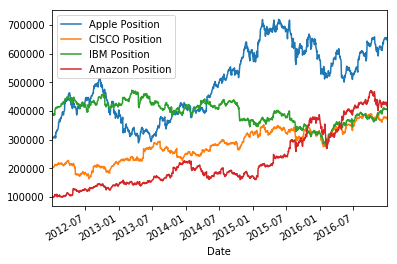

In [44]:
portfolio_val.drop('Total', axis=1).plot()

In [45]:
portfolio_val.head()

,Apple Position,CISCO Position,IBM Position,Amazon Position,Total
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [46]:
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)

In [47]:
portfolio_val.head()

,Apple Position,CISCO Position,IBM Position,Amazon Position,Total,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [48]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [49]:
portfolio_val['Daily Return'].std()

0.010568287769161718

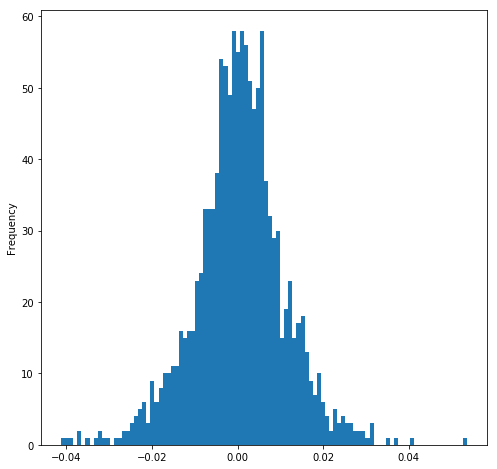

In [50]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(8,8))

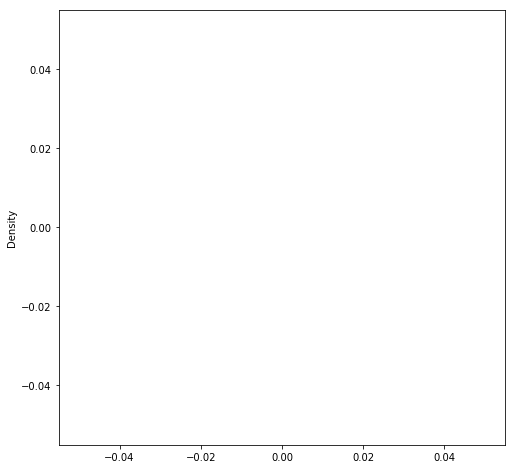

In [52]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(8,8))

In [53]:
cumulative_return = 100 * (portfolio_val['Total'][-1]/ portfolio_val['Total'][0]-1)

In [54]:
cumulative_return

84.742851816655445

In [55]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [56]:
SR

0.05149680662648092

In [57]:
ASR = (252 ** 0.5) * SR

In [58]:
ASR

0.8174864618859096